In [1]:
from functions.dataProcessing import *
from functions.plottingFunctions import *
import matplotlib.pyplot as plt
import seaborn

df = readData2()

In [2]:
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/2/'
res2 = processAllResults(path, processResults3)
f = open("experiment/roughEnvironment.json")
roughEnvironments = json.load(f)
f.close()
f = open("experiment/smoothEnvironment.json")
smoothEnvironments = json.load(f)
f.close()

df2 = readData()

inds = set(res2["id"])
pars_s = np.array(res2[(res2["context"]=="Spatial") & (res2["round"]==0) & (res2["trial"]==0)][["tau","beta"]])
pars_c = np.array(res2[(res2["context"]=="Conceptual") & (res2["round"]==0) & (res2["trial"]==0)][["tau","beta"]])

tau_s = [x[0] for x in pars_s]
beta_s = [x[1] for x in pars_s]
tau_c = [x[0] for x in pars_c]
beta_c = [x[1] for x in pars_c]

envs = [0]*129
for i in inds:
    envs[i] = getEnvType(df2, i)

smoothPars_s = [pars_s[x] for x in range(len(pars_s)) if envs[x]==1]
smoothPars_c = [pars_c[x] for x in range(len(pars_c)) if envs[x]==1]
roughPars_s = [pars_s[x] for x in range(len(pars_s)) if envs[x]==0]
roughPars_c = [pars_c[x] for x in range(len(pars_c)) if envs[x]==0]

smoothPars = smoothPars_s + smoothPars_c
roughPars = roughPars_s + roughPars_c
smoothPars = pd.DataFrame({"tau": [x[0] for x in smoothPars], "beta": [x[1] for x in smoothPars], "context": ["Spatial"]*len(smoothPars_s) + ["Conceptual"]*len(smoothPars_c)})
roughPars = pd.DataFrame({"tau": [x[0] for x in roughPars], "beta": [x[1] for x in roughPars], "context": ["Spatial"]*len(roughPars_s) + ["Conceptual"]*len(roughPars_c)})

In [3]:
def feature(feature, t=True, df=df):
    if t:
        return [x[0] for x in df[feature]]
    else:
        return [x[-1] for x in df[feature]]
    
# lines connecting two swarmplots
def lines(d, ax, ns):
    locs1 = ax.get_children()[ns[0]].get_offsets()
    locs2 = ax.get_children()[ns[1]].get_offsets()
    locs = locs2[np.argsort(d[ns[1]]).argsort()][np.argsort(d[ns[0]])]
    for i in range(locs1.shape[0]):
        plt.plot([locs1[i, 0], locs[i, 0]], [locs1[i, 1], locs[i, 1]], color="black", alpha=0.05)

In [4]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("environment")*2]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]
d = [smooth[1], smooth[0], rough[1], rough[0]]
data = {"P_correct": smooth[1]+smooth[0]+rough[1]+rough[0],
    "context": ["Conceptual"]*len(smooth[1]) + ["Spatial"]*len(smooth[0]) + ["ConceptuaI"]*len(rough[1]) + ["SpatiaI"]*len(rough[0]),
    "c": ["Conceptual"]*len(smooth[1]) + ["Spatial"]*len(smooth[0]) + ["Conceptual"]*len(rough[1]) + ["Spatial"]*len(rough[0])}


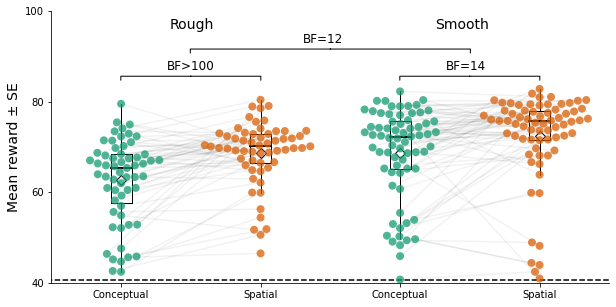

In [5]:
# Boxplot with pyplot
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.ylim((40,100))

plt.boxplot(d, showfliers=False, positions=range(4), widths=[0.15,0.15,0.15,0.15], medianprops={'color': 'black','lw': 2}, showcaps=False)
means = [np.mean(d[0]), np.mean(d[1]), np.mean(d[2]), np.mean(d[3])]
plt.plot([0,1,2,3], means, 'D', lw=0, ms=7, mec="black", mfc="white")

ax.set_yticks([40,60,80,100])

# Swarmplot with seaborn
seaborn.swarmplot(data=data , x="context", y="P_correct", palette=['#159c73','#d95f05'], size=8, alpha=0.75, hue="c")
plt.legend([],[], frameon=False)
seaborn.despine()
plt.ylabel("Mean reward ± SE", fontsize=14)
lines(d, ax, [0,1])
lines(d, ax, [2,3])

ax.text(0.35,96, "Rough", fontsize=14) 
ax.text(2.25,96, "Smooth", fontsize=14)  

ax.text(0.33,87, "BF>100", fontsize=12)  
ax.text(2.33,87, "BF=14", fontsize=12) 
ax.text(1.3,93, "BF=12", fontsize=12)  

ax.annotate('', xy=(0.5, 0.86), xytext=(0.5, 0.861), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=14.0, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.25, 0.76), xytext=(0.25, 0.761), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.75, 0.76), xytext=(0.75, 0.761), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=0.4', lw=1.0))
randomdata = pd.read_csv("rationalModels/random.csv", sep=",")
rndMean = np.mean(randomdata["meanReward"])
plt.plot([-1,100],[rndMean,rndMean], "--", c="black")
plt.show()

In [6]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("environment")*2]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]

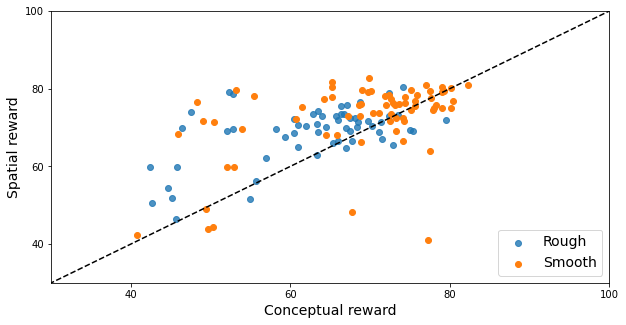

In [7]:
fig, ax = plt.subplots()
plt.xlim((30,100))
plt.ylim((30,100))
ax.set_yticks([40,60,80,100])
ax.set_xticks([40,60,80,100])
plt.xlabel("Conceptual reward", fontsize=14)
plt.ylabel("Spatial reward", fontsize=14)
plt.scatter(rough[1],rough[0], alpha=0.8)
plt.scatter(smooth[1],smooth[0])
plt.legend(["Rough","Smooth"], loc="lower right", prop={'size': 14})
plt.plot([0,100],[0,100], "--", c="black")
#plt.text(85, 45, "Environment", fontsize=16)
#plt.text(41,95, "r=.53, BF>100", fontsize=14)

plt.show()

In [8]:
d = [[np.mean(x[0:200]) for x in df["zscaled"]], [np.mean(x[200:400]) for x in df["zscaled"]], feature("contextOrder")*2]
spatial = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
conceptual = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]
d = [conceptual[1], conceptual[0], spatial[1], spatial[0]]
data = {"P_correct": conceptual[1]+conceptual[0]+spatial[1]+spatial[0],
    "context": ["Conceptual"]*len(conceptual[1]) + ["Spatial"]*len(conceptual[0]) + ["ConceptuaI"]*len(spatial[1]) + ["SpatiaI"]*len(spatial[0]),
    "c": ["Conceptual"]*len(conceptual[1]) + ["Spatial"]*len(conceptual[0]) + ["Conceptual"]*len(spatial[1]) + ["Spatial"]*len(spatial[0])}

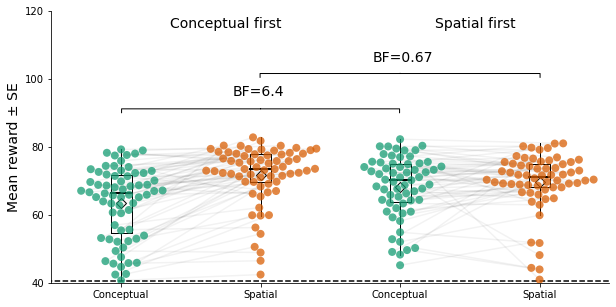

In [9]:
# Boxplot with pyplot
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
plt.ylim((40,120))

plt.boxplot(d, showfliers=False, positions=range(4), widths=[0.15,0.15,0.15,0.15], medianprops={'color': 'black','lw': 2}, showcaps=False)
means = [np.mean(d[0]), np.mean(d[1]), np.mean(d[2]), np.mean(d[3])]
plt.plot([0,1,2,3], means, 'D', lw=0, ms=7, mec="black", mfc="white")

# Swarmplot with seaborn
seaborn.swarmplot(data=data , x="context", y="P_correct", palette=['#159c73','#d95f05'], size=8, alpha=0.75, hue="c")
plt.legend([],[], frameon=False)
seaborn.despine()
plt.ylabel("Mean reward ± SE", fontsize=14)
ax.set_yticks([40,60,80,100,120])
lines(d, ax, [0,1])
lines(d, ax, [2,3])
    
ax.text(0.35,115, "Conceptual first", fontsize=14) 
ax.text(2.25,115, "Spatial first", fontsize=14)  

ax.text(0.8,95, "BF=6.4", fontsize=14)  
ax.text(1.8,105, "BF=0.67", fontsize=14) 

ax.annotate('', xy=(0.375, 0.64), xytext=(0.375, 0.641), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=13.9, lengthB=0.4', lw=1.0))

ax.annotate('', xy=(0.625, 0.77), xytext=(0.625, 0.771), xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=14, lengthB=0.4', lw=1.0))

randomdata = pd.read_csv("rationalModels/random.csv", sep=",")
rndMean = np.mean(randomdata["meanReward"])
plt.plot([-1,100],[rndMean,rndMean], "--", c="black")
plt.show()

In [10]:
d = [[x[0:200] for x in df["zscaled"]], [x[200:400] for x in df["zscaled"]], feature("environment")*2]
smooth = [[d[0][i] for i in range(len(d[0])) if d[2][i]==0],[d[1][i] for i in range(len(d[1])) if d[2][i]==0]]
rough = [[d[0][i] for i in range(len(d[0])) if d[2][i]==1],[d[1][i] for i in range(len(d[1])) if d[2][i]==1]]

def f1(data):
    return np.asmatrix([z for l in [[x[(y)*20:(y+1)*20] for y in range(10)] for x in data] for z in l]).transpose().tolist()

d1 = f1(smooth[0])
d2 = f1(smooth[1])
s = {
    "time": [y for l in [[x]*len(d2[0]) for x in range(20)] for y in l] + [y for l in [[x]*len(d1[0]) for x in range(20)] for y in l],
    "reward": [x for l in d2 for x in l] + [x for l in d1 for x in l],
    "type": ["Conceptual"]*len(d2[0])*20 + ["Spatial"]*len(d1[0])*20
}
d1 = f1(rough[0])
d2 = f1(rough[1])
r = {
    "time": [y for l in [[x]*len(d2[0]) for x in range(20)] for y in l] + [y for l in [[x]*len(d1[0]) for x in range(20)] for y in l],
    "reward": [x for l in d2 for x in l] + [x for l in d1 for x in l],
    "type": ["Conceptual"]*len(d2[0])*20 + ["Spatial"]*len(d1[0])*20
}

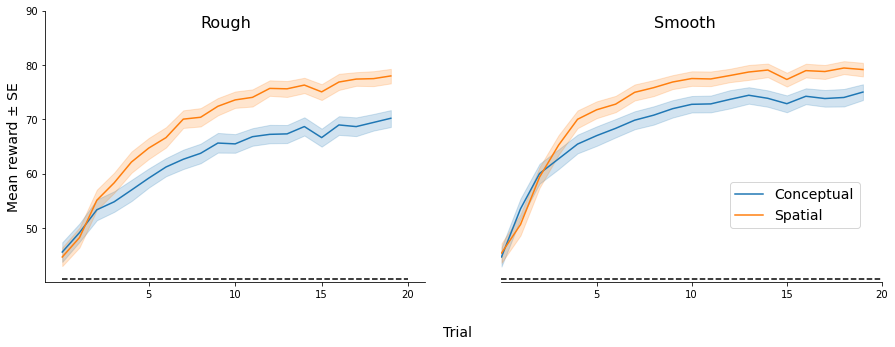

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axes[1].set_yticks([])
axes[0].set_yticks([50,60,70,80,90])
axes[0].set_xticks([5,10,15,20])
axes[1].set_xticks([5,10,15,20])
plt.ylim((40,90))
plt.xlim((0,20))
axes[0].set_ylabel("Mean reward ± SE", fontsize=14)
seaborn.lineplot(data=s, x="time", y="reward", hue="type", ax=axes[0])
seaborn.lineplot(data=r, x="time", y="reward", hue="type",ax=axes[1])
axes[0].legend([],[], frameon=False)
axes[1].legend([],[], frameon=False)
axes[1].legend(["Conceptual","Spatial"], loc=(0.6,0.2), prop={'size': 14})
axes[0].plot([0,20],[rndMean,rndMean], "--", c="black")
axes[1].plot([0,20],[rndMean,rndMean], "--", c="black")
seaborn.despine(bottom = False, left = False, ax=axes[0])
seaborn.despine(bottom = False, ax=axes[1])
axes[1].get_yaxis().set_visible(False)
axes[1].spines["left"].set_visible(False)

axes[0].text(8, 87, "Rough", fontsize=16) 
axes[1].text(8, 87, "Smooth", fontsize=16)  

#axes[1].text(14.5, 60, "Task", fontsize=18) 
axes[0].text(22, 30, "Trial", fontsize=14) 

plt.show()

In [12]:
# Load data obtained from 10,000 simulations
gprdf = pd.read_csv("results/3/simulated_data.csv")
gprdf2 = pd.read_csv("results/3/model1_simulations.csv")

Text(0, 0.5, 'Mean reward')

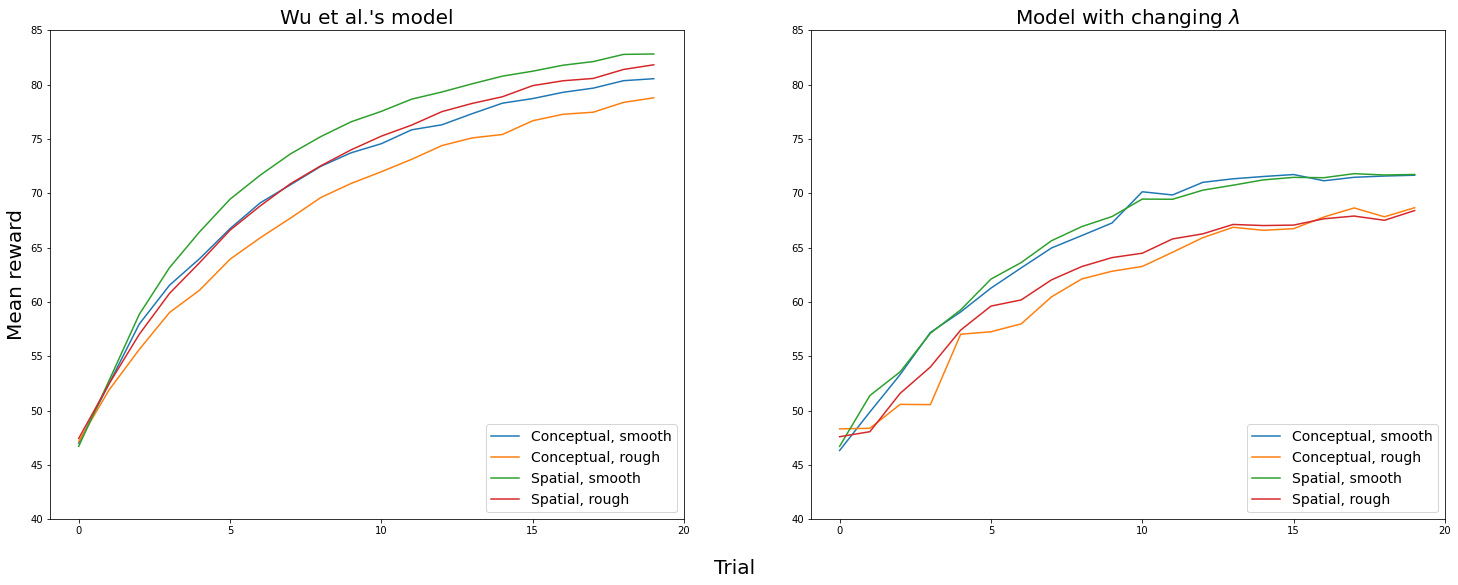

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, axes = plt.subplots(1, 2, figsize=(25, 9))
axes[0].plot(range(20), gprdf["meanReward"][0:20])
axes[0].plot(range(20), gprdf["meanReward"][20:40])
axes[0].plot(range(20), gprdf["meanReward"][40:60])
axes[0].plot(range(20), gprdf["meanReward"][60:80])

axes[1].plot(range(20), gprdf2["meanReward"][0:20])
axes[1].plot(range(20), gprdf2["meanReward"][20:40])
axes[1].plot(range(20), gprdf2["meanReward"][40:60])
axes[1].plot(range(20), gprdf2["meanReward"][60:80])

axes[0].set_ylim([40,85])
axes[1].set_ylim([40,85])
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[0].legend(["Conceptual, smooth", "Conceptual, rough","Spatial, smooth", "Spatial, rough"], loc="lower right", prop={'size': 14})
axes[1].legend(["Conceptual, smooth", "Conceptual, rough","Spatial, smooth", "Spatial, rough"], loc="lower right", prop={'size': 14})
axes[0].set_title("Wu et al.'s model", fontsize=20)
axes[1].set_title("Model with changing $\lambda$", fontsize=20)
axes[0].text(21, 35, "Trial", fontsize=20) 
axes[0].set_ylabel("Mean reward", fontsize=20)

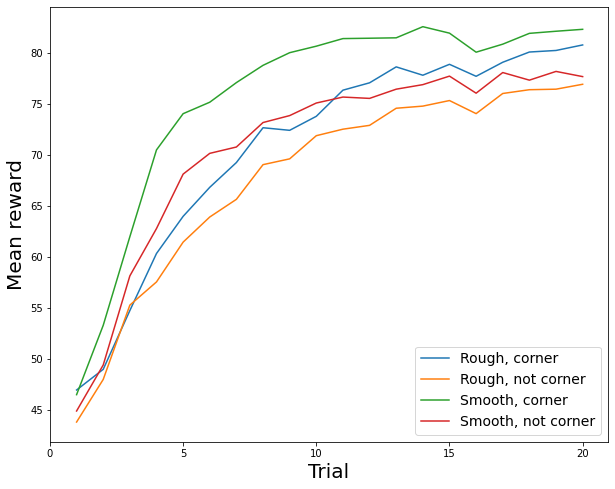

In [14]:
df = readData()
start_C = df[(df["trial"]==0) & (df["environment"]==0) & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["environment"]==0) & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==0)]["zscaled"])
    for ii in range(20):
        rc[ii] = rc[ii] + l[ii]
for ii in range(20):
    rc[ii] = rc[ii]/len(start_C)

nc = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==0)]["zscaled"])
    for ii in range(20):
        nc[ii] = nc[ii] + l[ii]
for ii in range(20):
    nc[ii] = nc[ii]/len(start_NC)
    

start_C = df[(df["trial"]==0) & (df["environment"]==1) & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))][["id","round"]]
start_NC = df[(df["trial"]==0) & (df["environment"]==1) & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)][["id","round"]]

rc2 = [0]*20
for i in range(len(start_C)):
    c = list(start_C.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==1)]["zscaled"])
    for ii in range(20):
        rc2[ii] = rc2[ii] + l[ii]
for ii in range(20):
    rc2[ii] = rc2[ii]/len(start_C)

nc2 = [0]*20
for i in range(len(start_NC)):
    c = list(start_NC.iloc[i])
    l = list(df[(df["id"]==c[0]) & (df["round"]==c[1]) & (df["environment"]==1)]["zscaled"])
    for ii in range(20):
        nc2[ii] = nc2[ii] + l[ii]
for ii in range(20):
    nc2[ii] = nc2[ii]/len(start_NC)
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(range(1,21),rc)
plt.plot(range(1,21),nc)
plt.plot(range(1,21),rc2)
plt.plot(range(1,21),nc2)
plt.xticks([0,5,10,15,20])
plt.xlabel("Trial", fontsize=20)
plt.ylabel("Mean reward", fontsize=20)
plt.legend(["Rough, corner", "Rough, not corner","Smooth, corner","Smooth, not corner"], fontsize=14)

Text(22, 36, 'Trial')

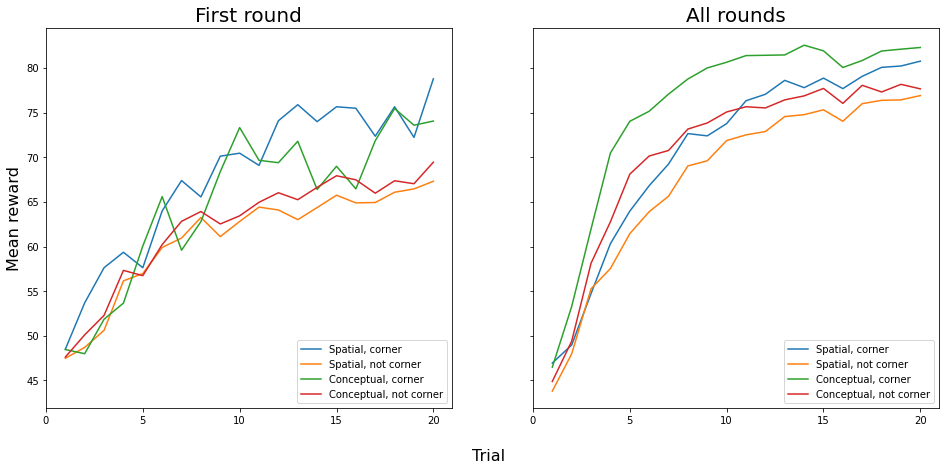

In [15]:
start_C = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Spatial") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))]["id"]
start_NC = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Spatial") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)]["id"]

rc0 = [0]*20
for i in range(len(start_C)):
    c = start_C.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        rc0[ii] = rc0[ii] + l[ii]
for ii in range(20):
    rc0[ii] = rc0[ii]/len(start_C)

nc0 = [0]*20
for i in range(len(start_NC)):
    c = start_NC.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        nc0[ii] = nc0[ii] + l[ii]
for ii in range(20):
    nc0[ii] = nc0[ii]/len(start_NC)

start_C = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Conceptual") & ((df["chosen"]==0) | (df["chosen"]==7) | (df["chosen"]==56) | (df["chosen"]==63))]["id"]
start_NC = df[(df["trial"]==0) & (df["round"]==0) & (df["context"]=="Conceptual") & (df["chosen"]!=0) & (df["chosen"]!=7) & (df["chosen"]!=56) & (df["chosen"]!=63)]["id"]

rc20 = [0]*20
for i in range(len(start_C)):
    c = start_C.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        rc20[ii] = rc20[ii] + l[ii]
for ii in range(20):
    rc20[ii] = rc20[ii]/len(start_C)

nc20 = [0]*20
for i in range(len(start_NC)):
    c = start_NC.iloc[i]
    l = list(df[(df["id"]==c) & (df["context"]=="Conceptual")]["zscaled"])
    for ii in range(20):
        nc20[ii] = nc20[ii] + l[ii]
for ii in range(20):
    nc20[ii] = nc20[ii]/len(start_NC)
    
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

plt.rcParams['figure.figsize'] = [10, 8]

axes[0].plot(range(1,21),rc0)
axes[0].plot(range(1,21),nc0)
axes[0].plot(range(1,21),rc20)
axes[0].plot(range(1,21),nc20)
axes[0].set_ylabel("Mean reward", fontsize=16)
axes[0].set_xticks([0,5,10,15,20])
axes[0].set_title("First round", fontsize=20)
axes[0].legend(["Spatial, corner", "Spatial, not corner","Conceptual, corner","Conceptual, not corner"], loc="lower right", fontsize=10)

axes[1].plot(range(1,21),rc)
axes[1].plot(range(1,21),nc)
axes[1].plot(range(1,21),rc2)
axes[1].plot(range(1,21),nc2)
axes[1].set_xticks([0,5,10,15,20])
axes[1].set_title("All rounds", fontsize=20)
axes[1].legend(["Spatial, corner", "Spatial, not corner","Conceptual, corner","Conceptual, not corner"], loc="lower right", fontsize=10)

axes[0].text(22, 36, "Trial", fontsize=16) 

Text(0.5, 1.0, 'Conceptual')

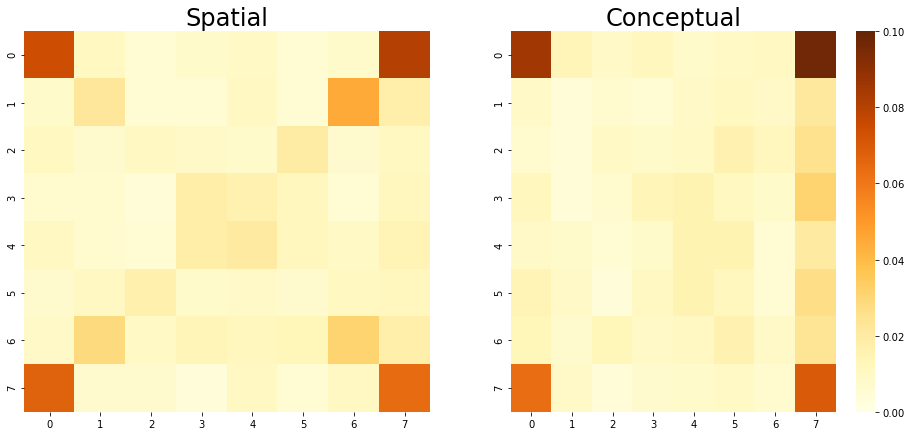

In [16]:
plt.rcParams['figure.figsize'] = [10, 8]

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

start = list(df[(df["trial"]==0) & (df["context"]=="Spatial")]["chosen"])
s = np.zeros(64)
for c in start:
    s[c] = s[c] + 1
s = s/np.sum(s)
g = seaborn.heatmap(createGPArray(s), 0, 0.1, "YlOrBr", ax=ax[0], cbar=False)
g.set_title("Spatial", fontsize=24)

start = list(df[(df["trial"]==0) & (df["context"]=="Conceptual")]["chosen"])
s = np.zeros(64)
for c in start:
    s[c] = s[c] + 1
s = s/np.sum(s)
g = seaborn.heatmap(createGPArray(s), 0, 0.1, "YlOrBr", ax=ax[1])
g.set_title("Conceptual", fontsize=24)

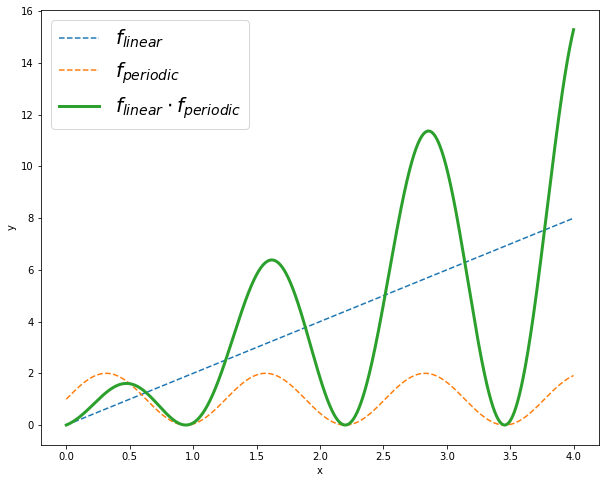

In [17]:
import numpy as np

x = [(x)/1000 for x in range(4000)]
y1 = [2*a for a in x]
y2 = [1+np.sin(a*5) for a in x]
y4 = [y1[i]*y2[i] for i in range(len(x))]
plt.plot(x, y1, "--")
plt.plot(x, y2, "--")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y4, linewidth=3)
plt.legend(["$f_{linear}$","$f_{periodic}$","$f_{linear}\cdot f_{periodic}$"], prop={'size': 20})

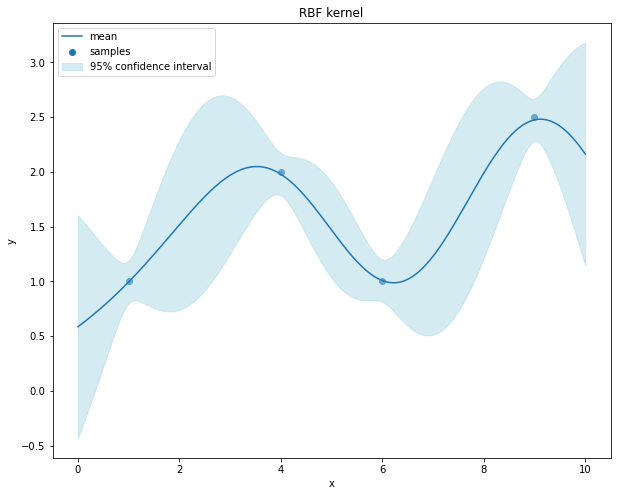

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, DotProduct, Product, Sum

X = np.linspace(0, 10, 1000).reshape(-1, 1)

X_train = np.array([[1],[4],[6],[9]])
y_train = np.array([1,2,1,2.5])

kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_pred, std_pred = gaussian_process.predict(X, return_std=True)

plt.rcParams['figure.figsize'] = [10, 8]

plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_pred, label="Mean prediction")
plt.fill_between(X.ravel(), mean_pred - 1.96*std_pred, mean_pred + 1.96*std_pred, alpha=0.5, color="lightblue")
plt.title("RBF kernel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["mean","samples","95% confidence interval"], loc="upper left")

Text(0, 0.5, 'log beta')

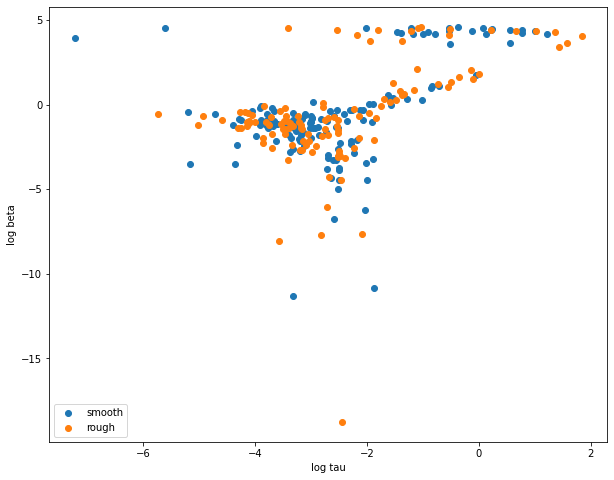

In [19]:
plt.scatter(np.log(smoothPars["tau"]),np.log(smoothPars["beta"]))
plt.scatter(np.log(roughPars["tau"]),np.log(roughPars["beta"]))
plt.legend(["smooth","rough"])
plt.xlabel("log tau")
plt.ylabel("log beta")

Text(0, 0.5, 'log beta')

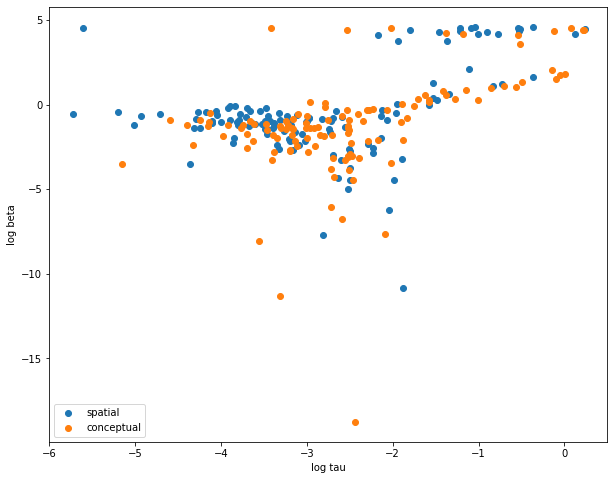

In [20]:
pars_s = smoothPars_s + roughPars_s
pars_c = smoothPars_c + roughPars_c
plt.scatter(np.log([x[0] for x in pars_s]),np.log([x[1] for x in pars_s]))
plt.scatter(np.log([x[0] for x in pars_c]),np.log([x[1] for x in pars_c]))
plt.legend(["spatial","conceptual"])
plt.xlim([-6,0.5])
plt.xlabel("log tau")
plt.ylabel("log beta")

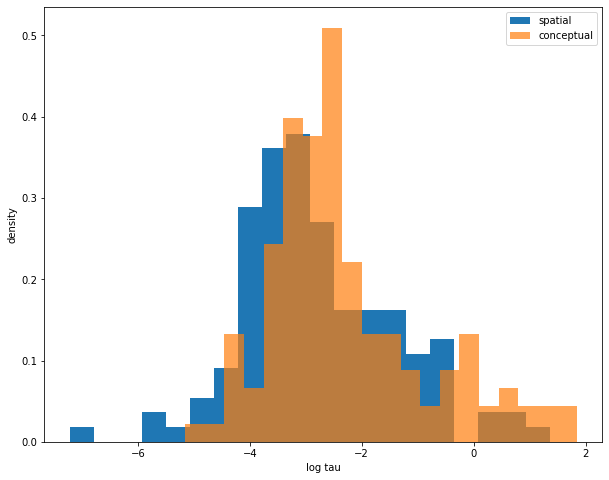

In [21]:
plt.hist(np.log([x[0] for x in pars_s]), 20, density=True)
plt.hist(np.log([x[0] for x in pars_c]), 20, density=True, alpha=0.7)
plt.ylabel("density")
plt.xlabel("log tau")
plt.legend(["spatial","conceptual"])

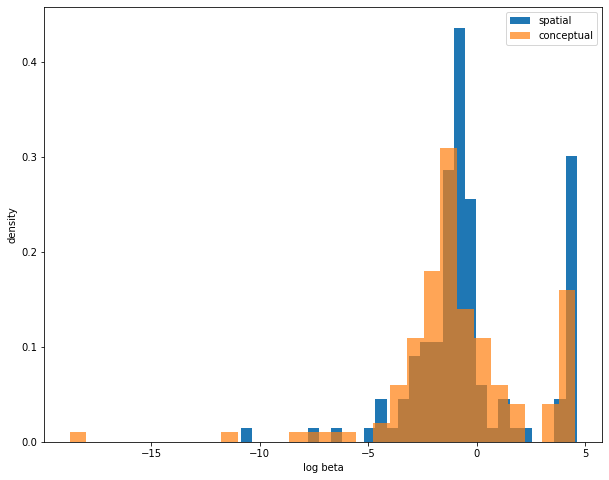

In [22]:
plt.hist(np.log([x[1] for x in pars_s]), 30, density=True)
plt.hist(np.log([x[1] for x in pars_c]), 30, density=True, alpha=0.7)
plt.ylabel("density")
plt.xlabel("log beta")
plt.legend(["spatial","conceptual"])

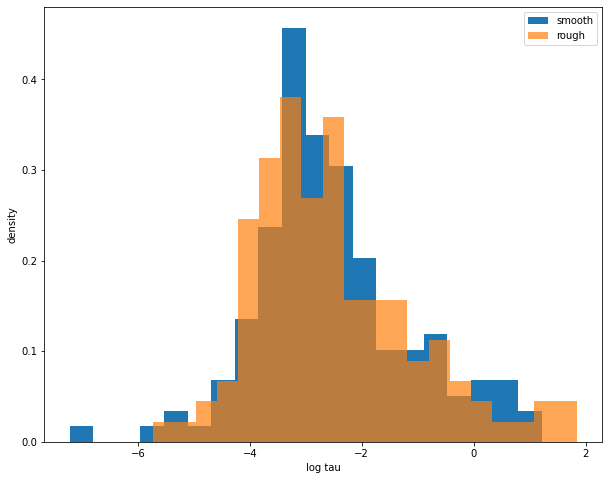

In [23]:
plt.hist(np.log(smoothPars["tau"]), 20, density=True)
plt.hist(np.log(roughPars["tau"]), 20, density=True, alpha=0.7)
plt.ylabel("density")
plt.xlabel("log tau")
plt.legend(["smooth","rough"])

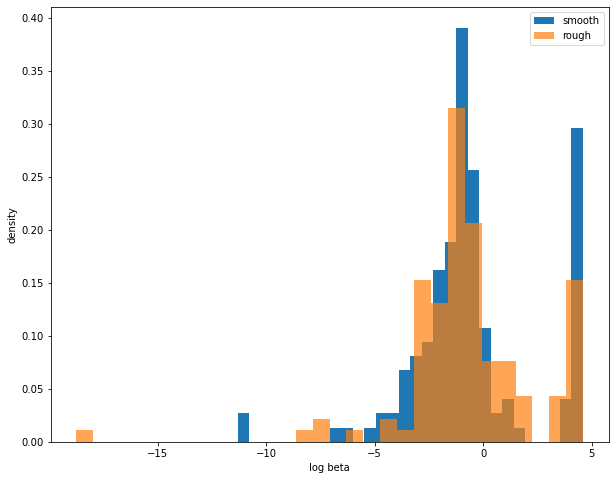

In [24]:
plt.hist(np.log(smoothPars["beta"]), 30, density=True)
plt.hist(np.log(roughPars["beta"]), 30, density=True, alpha=0.7)
plt.ylabel("density")
plt.xlabel("log beta")
plt.legend(["smooth","rough"])

In [25]:
path = 'C:/Users/Jaakko/Documents/GitHub/Masters-thesis/results/1/'
res3 = processAllResults(path, processResults5)
data = pd.read_csv("paramEstimates_wu.csv", index_col=0)
rbfucb = data[(data["kernel"]=="RBF") & (data["acq"]=="UCB")]

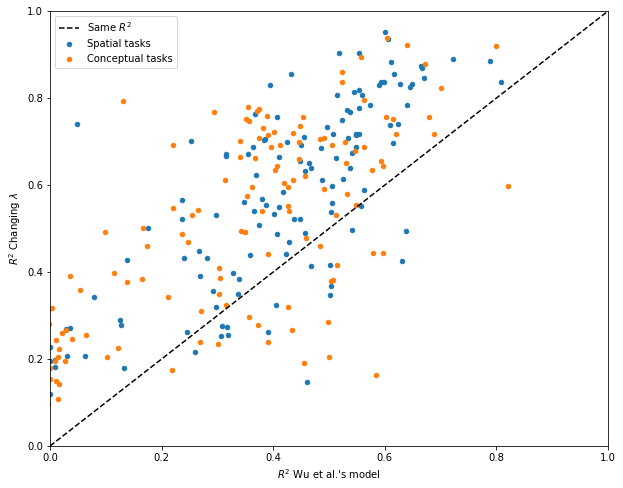

In [26]:
inds = set(res3["id"])
nLLrandom = np.log(1/64)*19*9
R21 = [0]*len(inds)
R22 = [0]*len(inds)

for i in inds:
    id2 = getId(df,i)
    nll1 = -sum(res3[(res3["context"]=="Spatial") & (res3["id"]==i)]["looNLL"])/8
    nll2 = -sum(rbfucb[(rbfucb["participant"]==id2) & (rbfucb["context"]=="Spatial")]["roundnLL"])
    R21[i] = 1-nll1/nLLrandom
    R22[i] = 1-nll2/nLLrandom
    
R21_c = [0]*len(inds)
R22_c = [0]*len(inds)

for i in inds:
    id2 = getId(df,i)
    nll1 = -sum(res3[(res3["context"]=="Conceptual") & (res3["id"]==i)]["looNLL"])/8
    nll2 = -sum(rbfucb[(rbfucb["participant"]==id2) & (rbfucb["context"]=="Conceptual")]["roundnLL"])
    R21_c[i] = 1-nll1/nLLrandom
    R22_c[i] = 1-nll2/nLLrandom
    
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(R22,R21, 20)
plt.scatter(R22_c,R21_c, 20)
plt.plot([0,1],[0,1], "--", c="black")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("$R^2$ Changing $\lambda$")
plt.xlabel("$R^2$ Wu et al.'s model")
plt.legend(["Same $R^2$", "Spatial tasks", "Conceptual tasks"])

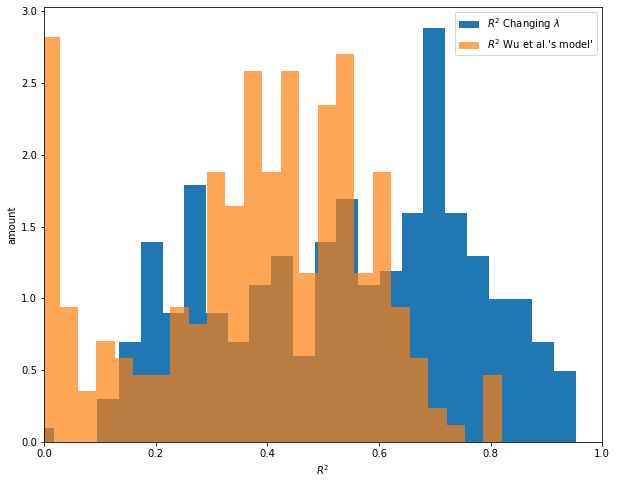

In [27]:
plt.hist(R21+R21_c, 25, density=True)
plt.hist(R22+R22_c, 25, density=True, alpha=0.7)
plt.xlim([0,1])
plt.xlabel("$R^2$")
plt.ylabel("amount")
plt.legend(["$R^2$ Changing $\lambda$","$R^2$ Wu et al.'s model'"])

([<matplotlib.axis.XTick at 0x29a14a30>,
 <a list of 5 Text major ticklabel objects>)

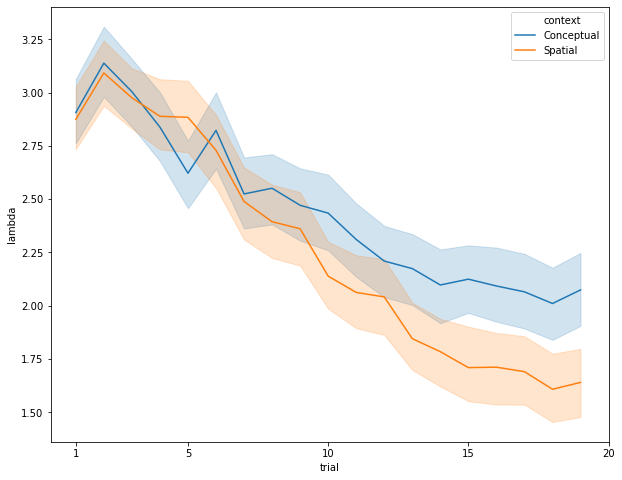

In [28]:
seaborn.lineplot(data=res2[res2["trial"]!=0], x="trial", y="lambda", hue="context")
plt.xticks([1,5,10,15,20])

([<matplotlib.axis.XTick at 0x20bf8a60>,
 <a list of 5 Text major ticklabel objects>)

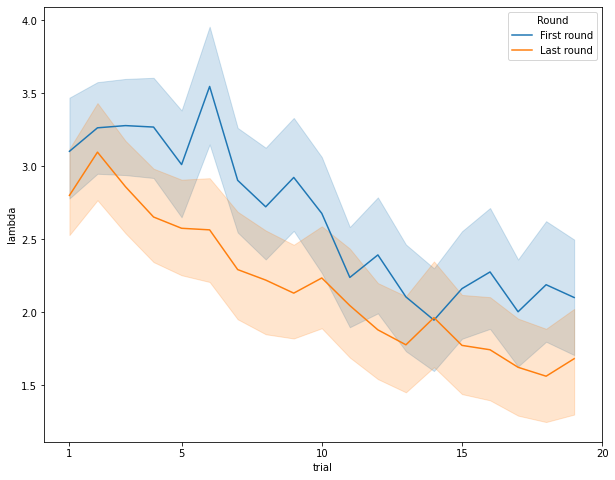

In [29]:
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==0)], x="trial", y="lambda")
seaborn.lineplot(data=res2[(res2["trial"]!=0) & (res2["round"]==8)], x="trial", y="lambda")
plt.legend(["First round","Last round"], title="Round")
plt.xticks([1,5,10,15,20])

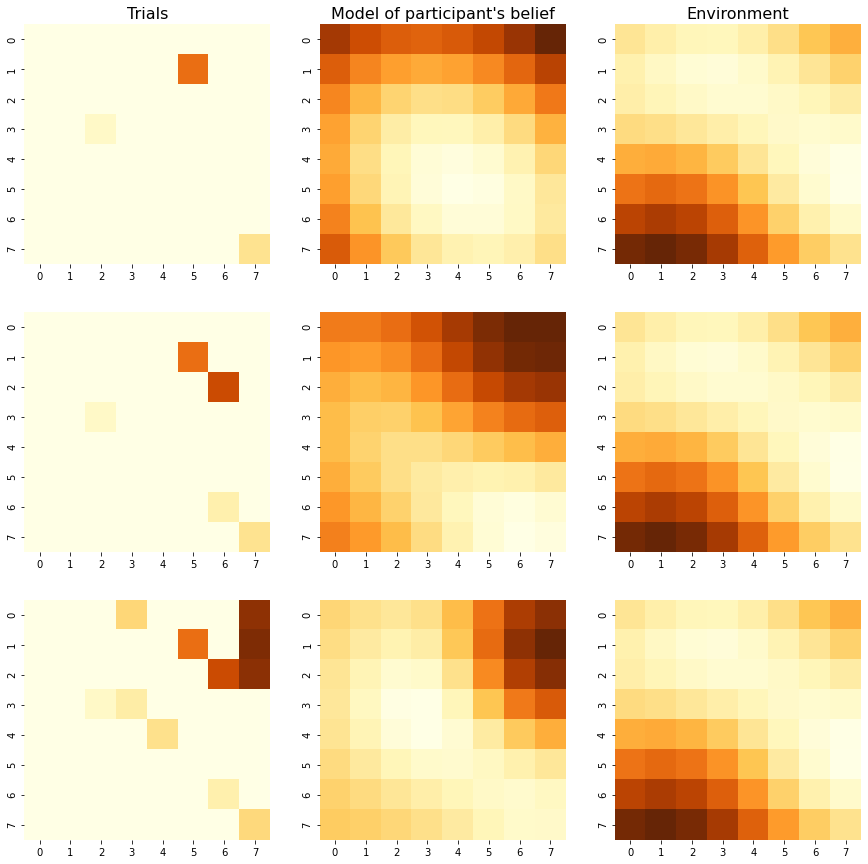

In [30]:
participant = 17
rnd = 5
context = "Spatial"
trials = [3, 5, 12]

plotTrials(res2, df, roughEnvironments, smoothEnvironments, participant, rnd, context, trials)